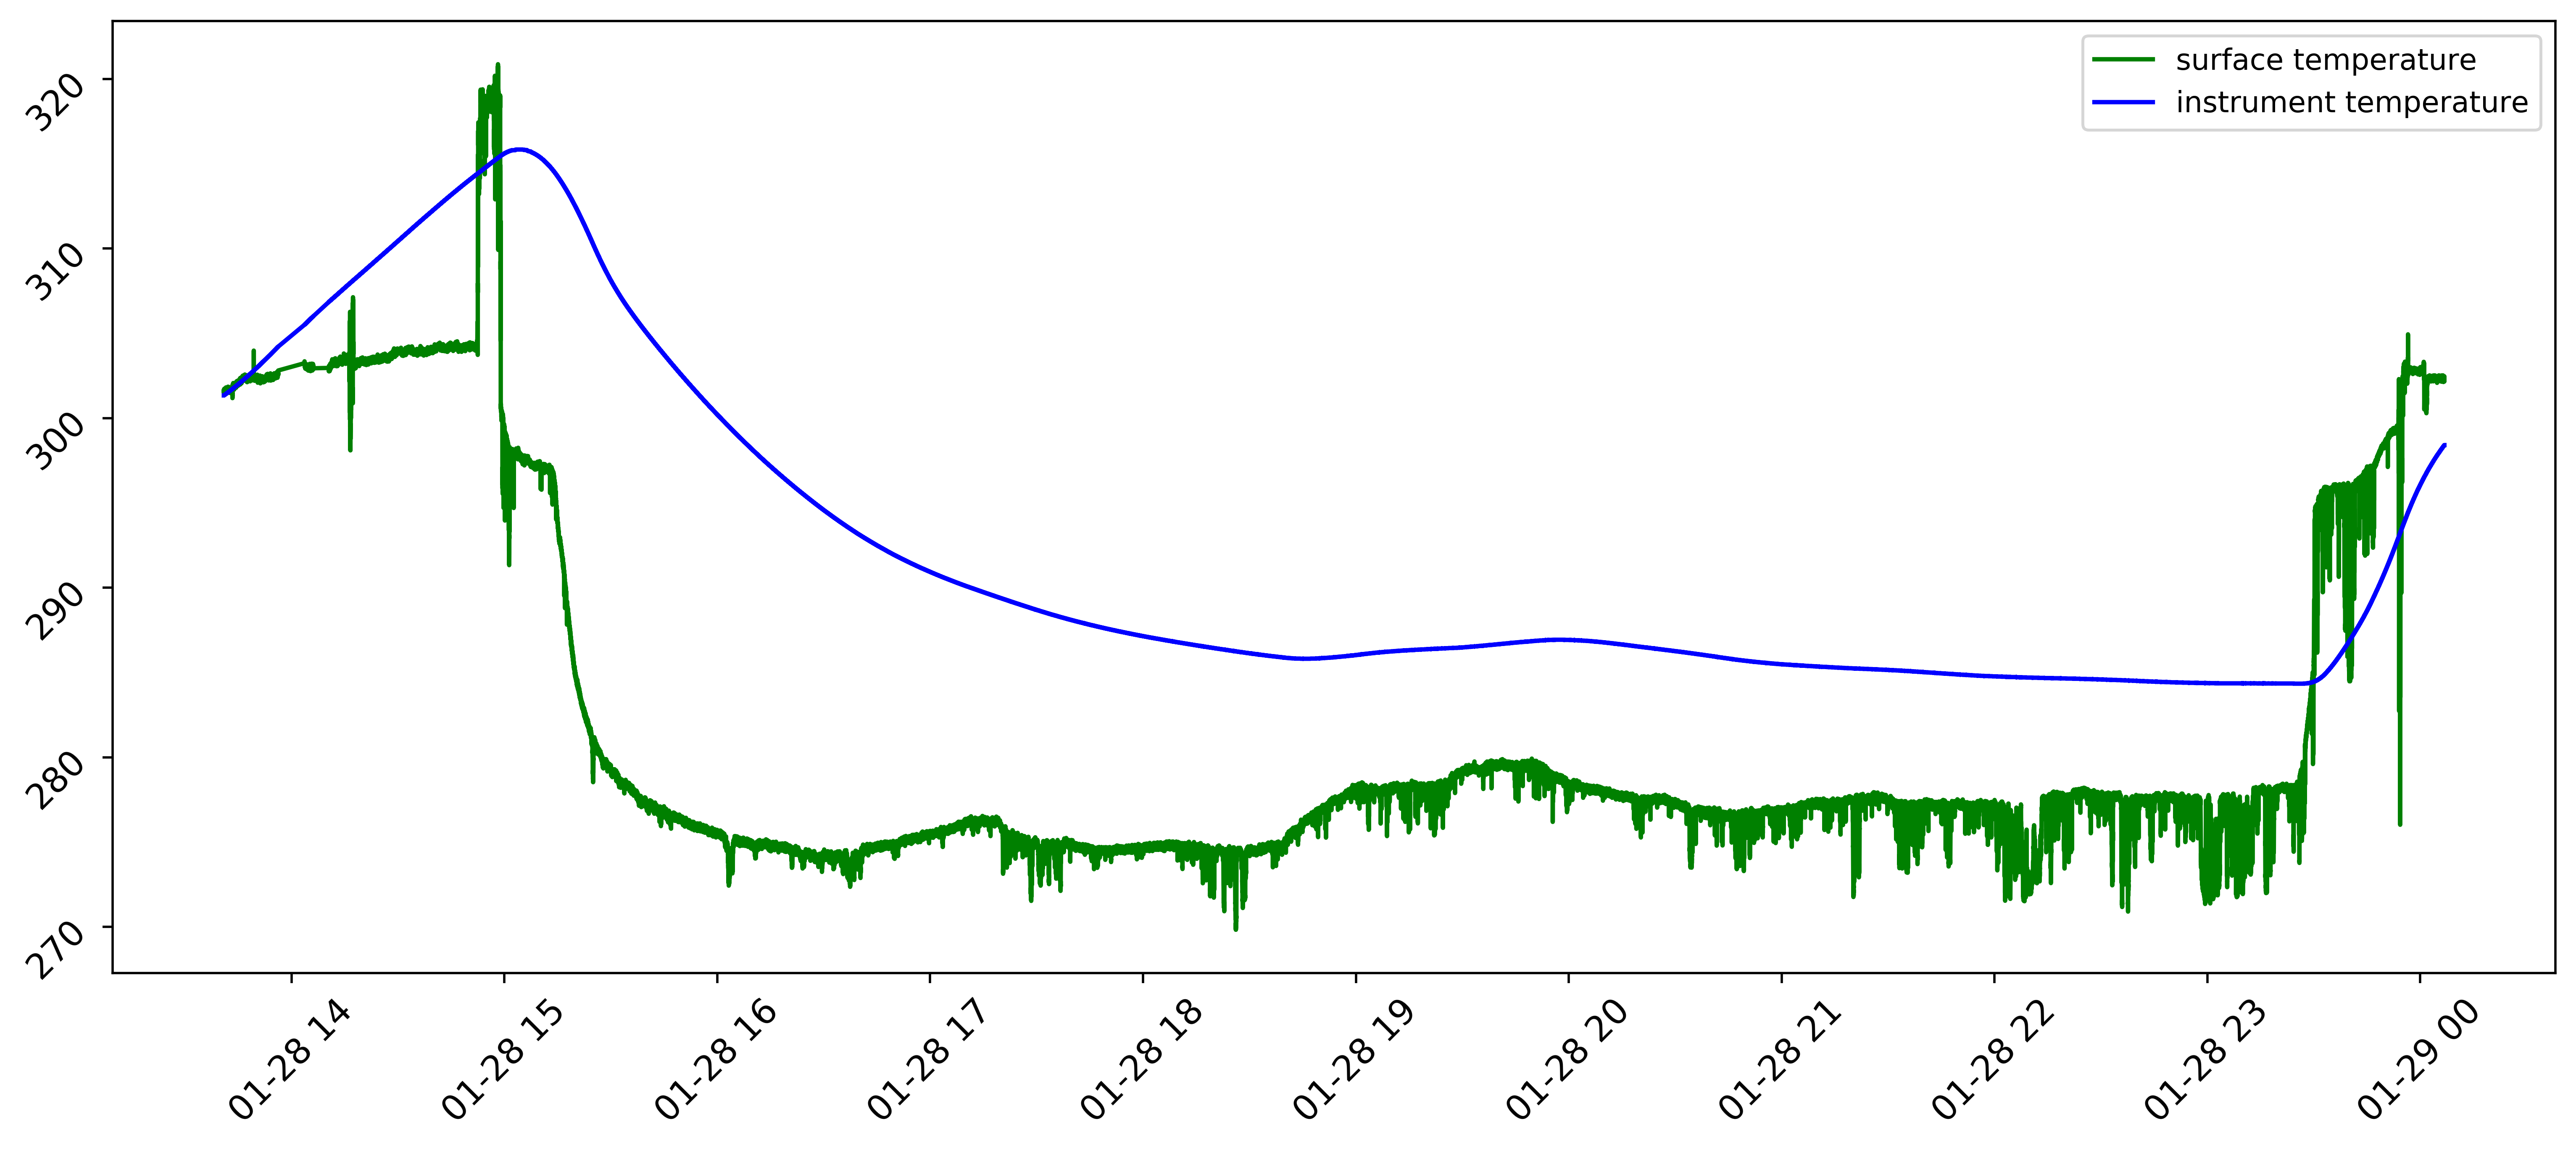

In [27]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
read_files = glob.glob(os.path.join("KT19_20200128_*.dat"))
array = []
for files in read_files:
    data = pd.read_csv(files, header = 0)
    array.append(data)
#    print(files)
merge_values = np.vstack(array)
df_KT19 = pd.DataFrame(merge_values) 
df_KT19.to_csv('data_KT19.csv', header=None,index=False)
KT19_22_jan = pd.read_csv('data_KT19.csv', delim_whitespace=True, header=None)
KT19_22_jan.columns = ['date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
hour = [] 
for i in KT19_22_jan.hours:
    hour.append('{:02}'.format(i))
hour = pd.DataFrame(hour)
KT19_22_jan= pd.concat([hour,KT19_22_jan], axis = 1)
Min = [] 
for i in KT19_22_jan.minutes:
    Min.append('{:02}'.format(i))
Min = pd.DataFrame(Min)
KT19_22_jan= pd.concat([Min,KT19_22_jan], axis = 1)
KT19_22_jan.columns = ['Min','hour','date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
KT19_22_jan['time'] = KT19_22_jan.date.astype(str).str.cat(KT19_22_jan[['hour','Min','seconds']].astype(str))
KT19_22_jan["time"]= KT19_22_jan["time"].astype(str) 
#KT19_22_jan.to_csv('KT19_22_jan.csv')
my_date = []
for m in KT19_22_jan.time:
    date = datetime.strptime(m, "%Y%m%d%H%M%S.%f")
    my_date.append(date)
my_date = pd.DataFrame(my_date)
KT19_22 = pd.concat([my_date,KT19_22_jan.temperature,KT19_22_jan.time,KT19_22_jan.instrument_temp], axis = 1)
KT19_22.columns = ['datetime', 'temperature','time','instrument_temp']
plt.figure(figsize=(15,6),dpi=500)
plt.plot(KT19_22.datetime,KT19_22.temperature, 'g', label = 'surface temperature')
plt.plot(KT19_22.datetime,KT19_22.instrument_temp, 'b', label = 'instrument temperature')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend()
plt.show()

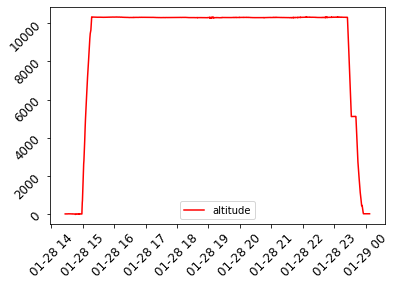

In [26]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
navigation = pd.read_csv('Nav_GPSPos0000_28jan.Asc', skiprows=10, delim_whitespace = True, header = None)
navigation
navigation.iloc[:,[1,4]]
import datetime
start = datetime.datetime(2020, 1, 28, 14, 26, 49)
end = datetime.datetime(2020, 1, 28, 0, 7, 8)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_big = pd.concat([df_time_delta, navigation.iloc[:,4:5]], axis=1)
df_big.dropna(inplace =True)
df_big.columns = ['Time','Altitude']
plt.plot(df_big.Time,df_big.Altitude, 'r', label = 'altitude')
#plt.plot(df_big.Time,df_big.Altitude,'b', label = 'altitude')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend()
plt.show()
#52009

In [8]:
import datetime 
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
navigation = pd.read_csv('Nav_GPSPos0000_28jan.Asc', skiprows=10, delim_whitespace = True, header = None)
navigation
nav=navigation.iloc[:,[1,4]]
nav.columns = ['time','altitude']
def convert(n): 
    return str(datetime.timedelta(seconds = n)) 
Time = []
for i in nav.time:
    t = convert(i)
    Time.append(t)
date_time = pd.DataFrame(Time)

In [9]:
date_time

,0
0,14:26:49
1,14:26:50
2,14:26:51
3,14:26:52
4,14:26:53
...,...
34815,0:07:04
34816,0:07:05
34817,0:07:06
34818,0:07:07


In [25]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(52009)

[14, 26, 49]

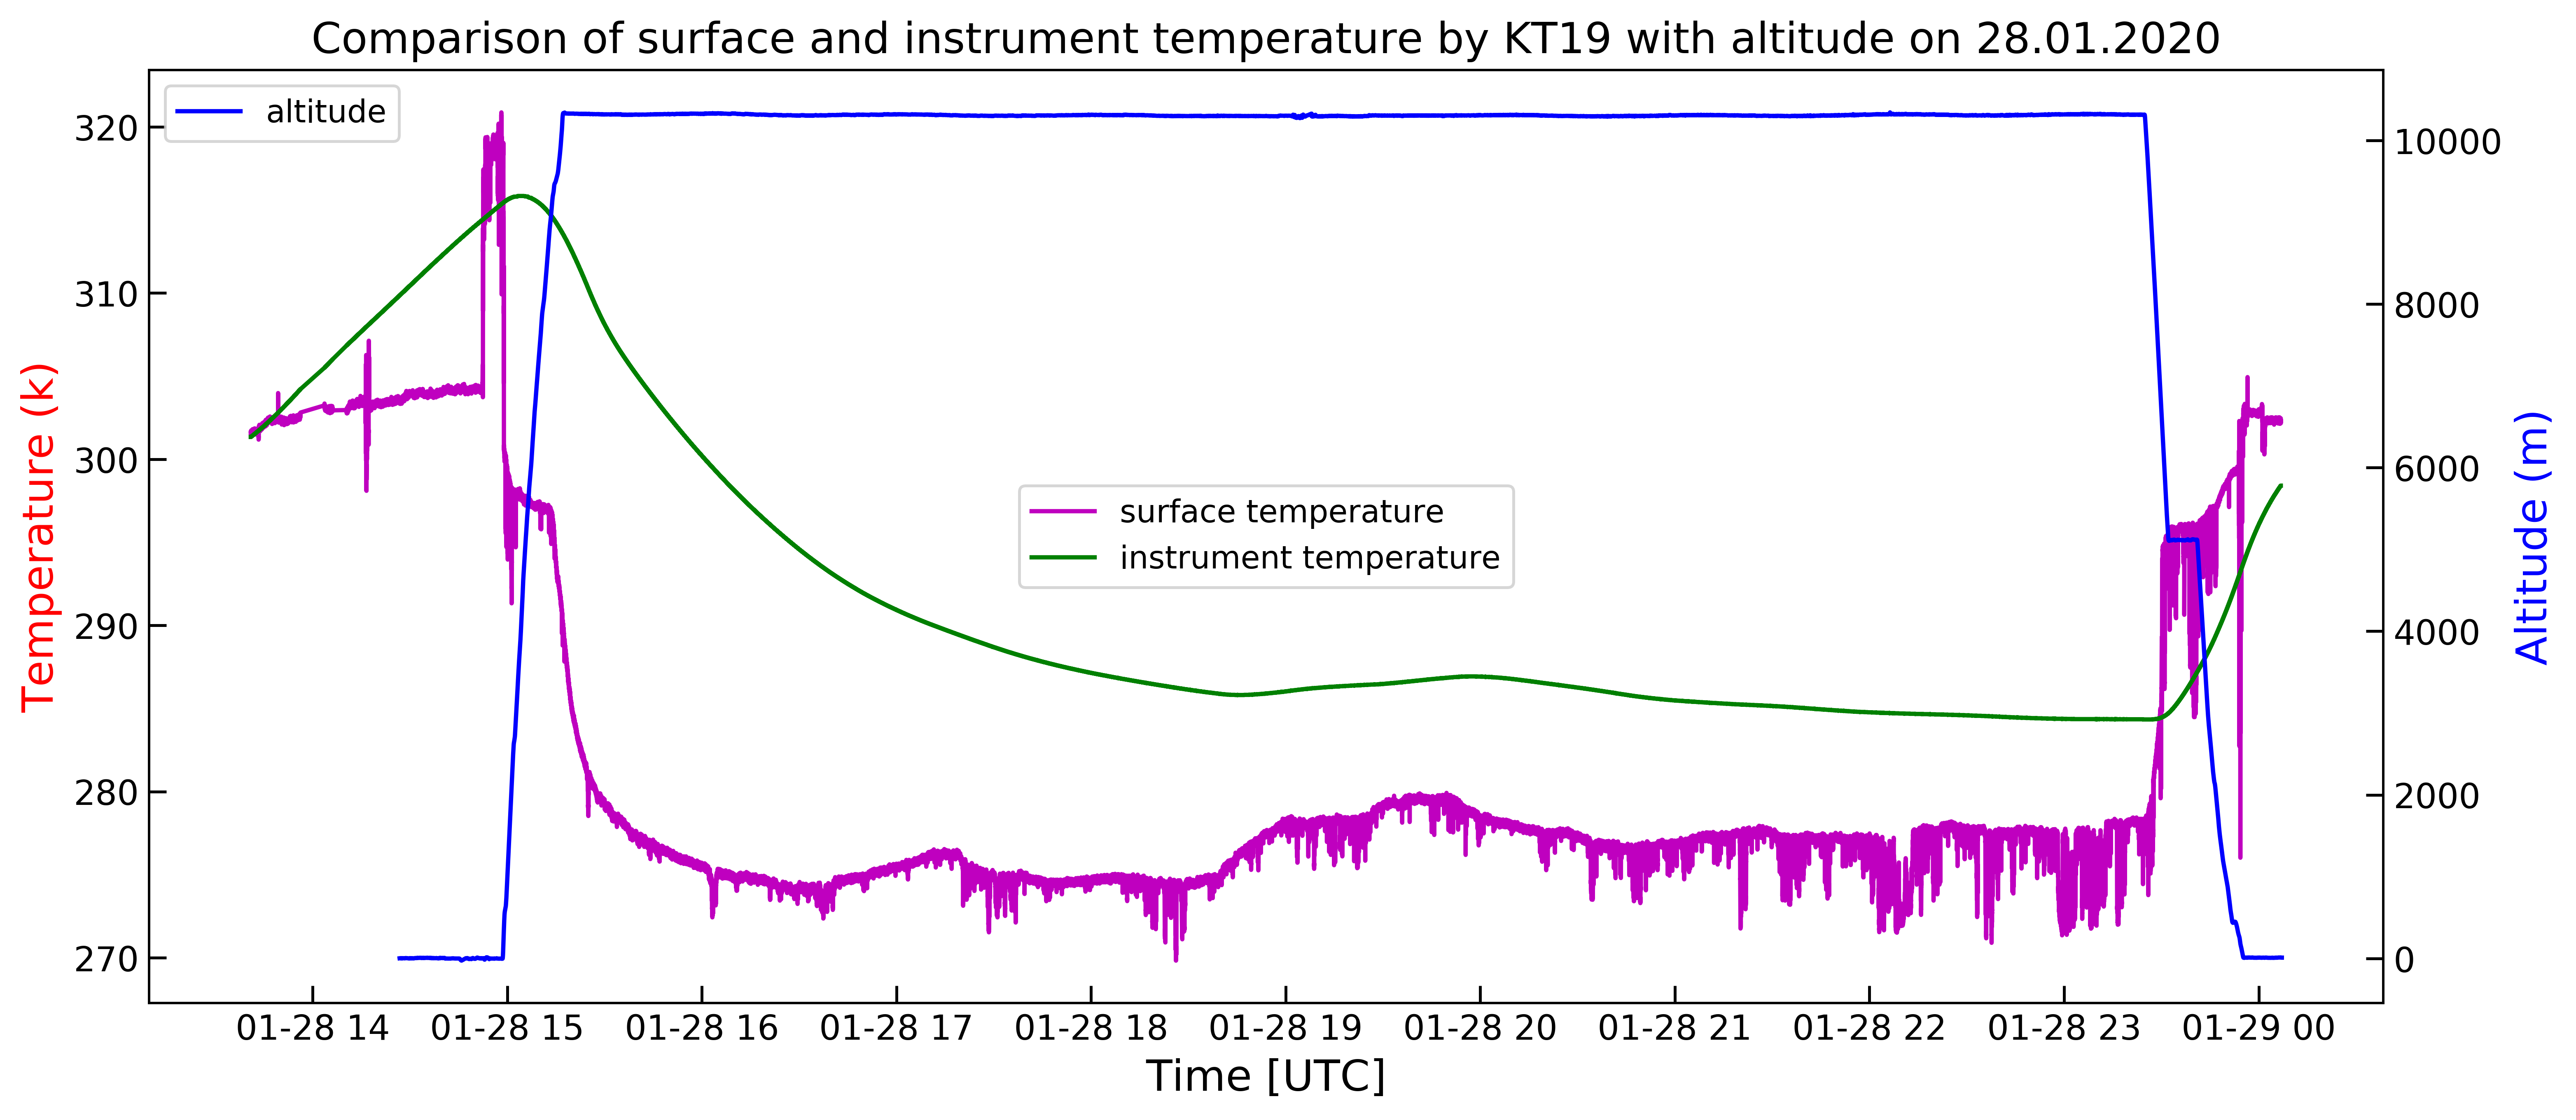

In [32]:
fig, ax1 = plt.subplots(figsize=(14,6),dpi=500)
ax2 = ax1.twinx()
ax1.tick_params(direction='in', length=6, width=1, colors='k',
                grid_color='k', grid_alpha=0.5)
ax2.tick_params(direction='in', length=6, width=1, colors='k',
                grid_color='k', grid_alpha=0.5)
#ax2.set_xticklabels(xticklabels, fontsize=7)
ax1.xaxis.set_tick_params(labelsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax1.plot(KT19_22.datetime,KT19_22.temperature, 'm', label = 'surface temperature')
ax1.plot(KT19_22.datetime,KT19_22.instrument_temp, 'g', label = 'instrument temperature')
ax2.plot(df_big.Time,df_big.Altitude, 'b-', label= 'altitude')
ax1.set_xlabel('Time [UTC]',fontsize = 15)
ax1.set_ylabel('Temperature (k)', color='r',fontsize = 15)
ax2.set_ylabel('Altitude (m)', color='b',fontsize = 15)
ax1.legend(fontsize=11, loc = 'center')
ax2.legend(fontsize=11, loc = 'upper left')
plt.title('Comparison of surface and instrument temperature by KT19 with altitude on 28.01.2020', fontsize=15)
# ax1.set_ylim(260,340)
# ax2.set_ylim(0,12000)
plt.show()